In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [3]:
# chem2017 = pd.read_excel('Eh pH fO2 BA1A 2017 recalc 2-21.xlsx')
# chem2017

In [4]:
# chem2018 = pd.read_excel('Eh pH fO2 BA1A 2018 recalc 2-21.xlsx')
# chem2018

In [5]:
# fig, ax = plt.subplots(figsize=(15, 5))

# chem2017.plot('DEPT[M]', 'PH', ax=ax)
# chem2018.plot('depth, m', 'pH', ax=ax)

In [6]:
# fig, ax = plt.subplots(figsize=(15, 5))

# chem2017.plot('DEPT[M]', 'log(fO2), bars', ax=ax)
# chem2018.plot('depth, m', 'log(fO2), bars', ax=ax)

In [7]:
# chem2017['DEPT[M]'].diff()

In [75]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.4].copy()
df188 = df188[df188.max_amp > 0.4].copy()
df197 = df197[df197.max_amp > 0.4].copy()
df211 = df211[df211.max_amp > 0.4].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

df141 = df141[df141.depth < 400].copy()
df188 = df188[df188.depth < 400].copy()
df197 = df197[df197.depth < 400].copy()
df211 = df211[df211.depth < 400].copy()

In [76]:
df141.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,1151.880597,286.924160,38.095802,3.637313,3.635075,18037.341804,-0.019974,1.466246,66.599238
std,622.422517,64.482252,23.478824,0.979146,0.971802,0.012543,0.015209,1.202082,39.309648
min,8.000000,163.875000,-138.250000,2.000000,2.000000,18037.318261,-0.198000,0.400552,17.821346
25%,602.500000,219.000000,22.750000,3.000000,3.000000,18037.327982,-0.031000,0.758472,43.028880
50%,1165.000000,298.625000,35.000000,4.000000,4.000000,18037.343787,-0.018000,1.102086,56.614243
75%,1678.250000,342.375000,55.125000,4.000000,4.000000,18037.352449,-0.008000,1.772691,76.524026
max,2240.000000,396.625000,190.750000,5.000000,5.000000,18037.359599,0.000000,15.617982,324.464846


In [77]:
df188.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,1703.873313,279.567625,36.151218,3.549325,3.574247,18084.395827,-0.026186,1.243024,61.136973
std,801.395792,60.271599,29.770726,0.918966,0.934131,0.010332,0.019909,0.899404,27.869878
min,9.000000,160.375000,-79.625000,2.000000,2.000000,18084.365954,-0.190000,0.400080,15.532961
25%,1119.500000,235.625000,14.000000,3.000000,3.000000,18084.389759,-0.035000,0.604019,41.828936
50%,1812.000000,275.875000,35.000000,4.000000,4.000000,18084.395708,-0.025000,0.960872,55.415323
75%,2382.000000,324.437500,57.750000,4.000000,4.000000,18084.402910,-0.014000,1.549296,73.087817
max,2880.000000,393.125000,217.000000,5.000000,5.000000,18084.417749,0.000000,7.598072,218.102540


In [78]:
df197.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,538.982935,254.654231,34.722491,3.269625,3.201365,18093.960190,-0.022481,0.942091,47.800524
std,296.999429,61.502244,24.253764,0.961056,0.901140,0.015863,0.014491,0.793144,19.139313
min,1.000000,164.750000,-5.250000,2.000000,2.000000,18093.918081,-0.141000,0.400242,15.269054
25%,296.000000,210.250000,14.875000,3.000000,3.000000,18093.951452,-0.034000,0.520124,34.742011
50%,563.000000,245.250000,35.875000,3.000000,3.000000,18093.959473,-0.022000,0.714560,44.057340
75%,803.000000,293.375000,51.625000,4.000000,4.000000,18093.970574,-0.012000,1.074055,55.863817
max,1053.000000,398.375000,158.375000,5.000000,5.000000,18093.993147,0.000000,8.773850,134.441032


In [79]:
df211.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,162.394231,263.797472,37.259010,3.331731,3.341346,18107.952145,-0.019851,3.476313,106.381271
std,80.074653,61.883955,24.127642,1.002679,0.886736,0.003597,0.013965,2.834372,75.749087
min,5.000000,168.250000,-12.250000,2.000000,2.000000,18107.941234,-0.090000,0.400949,20.511069
25%,96.750000,205.000000,19.250000,2.000000,3.000000,18107.948935,-0.030000,1.584618,53.074904
50%,162.500000,264.937500,35.000000,3.000000,3.000000,18107.952489,-0.018000,2.544889,81.924370
75%,228.500000,308.468750,53.374344,4.000000,4.000000,18107.954589,-0.008000,4.726548,131.948192
max,321.000000,387.000000,192.500000,5.000000,5.000000,18107.959008,0.000000,14.438993,483.537635


In [80]:
def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    # ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()


def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

amplitude: 15.617981986417888
3571.5999999999935
amplitude: 7.598071922037461
4475.129000000003
amplitude: 8.773849871513404
6485.752999000002
amplitude: 14.19216906529866
895.2549999999997


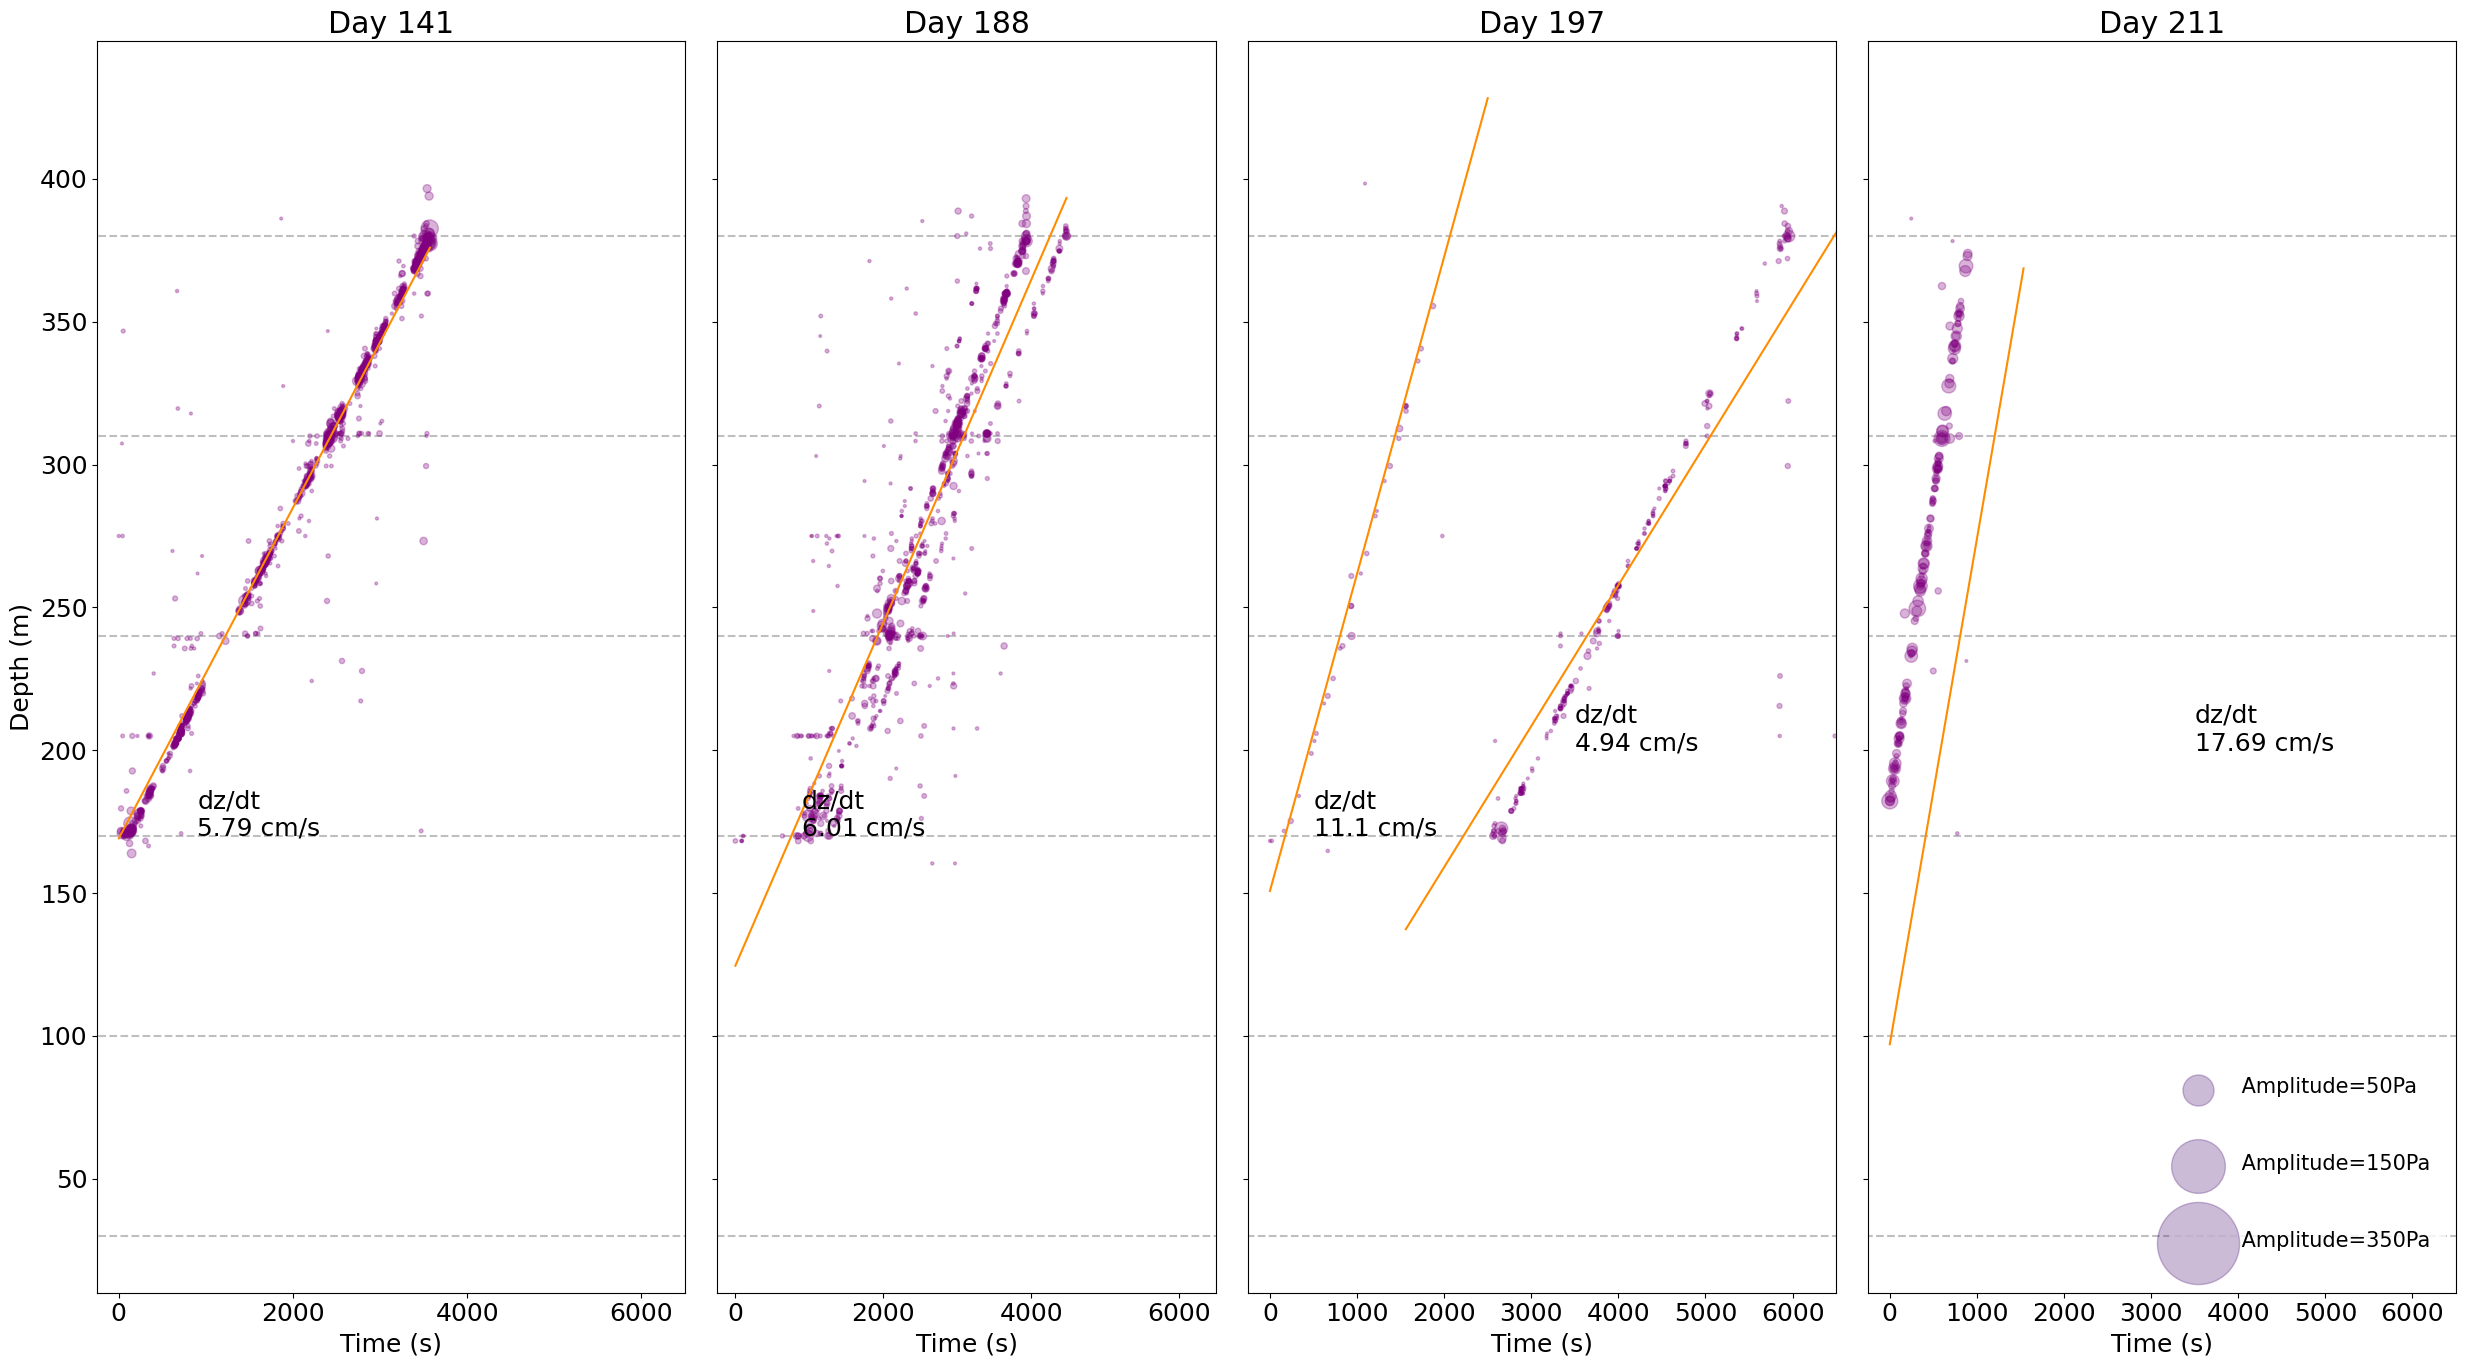

In [88]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

# mosaic['b'].set_ylim(400, 150)
mosaic['b'].set_xticks([])
mosaic['b'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

# mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211[20:-10], ax=mosaic['e'])

def fitline(data, ax):
    # x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
# fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:30].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[30:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

# 211 fitline
data = df211.copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod)
mosaic['e'].plot(xmod, ymod, color='darkorange')
mosaic['e'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

mosaic['b'].set_xticks(np.arange(0, 6001, 2000))
# mosaic['b'].set_xlim(-50, 4500)

fig.tight_layout()
fig.savefig('fig4.pdf', bbox_inches='tight')

In [82]:
df141[df141.depth>400]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time


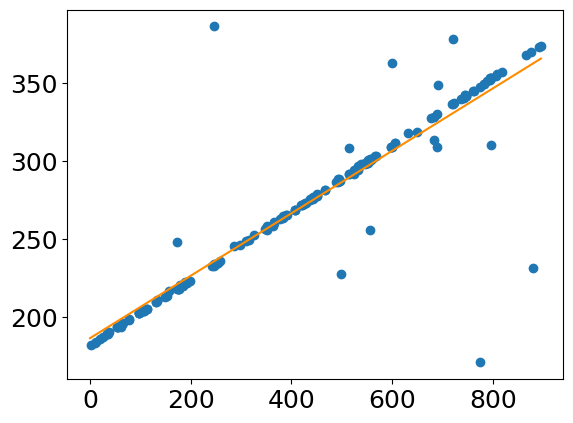

In [83]:
fig, ax = plt.subplots()

data = df211[20:-10].copy()

ax.scatter(data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)[2:]
        ,data['depth'][2:]
          )

x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
# xmod = np.linspace(xstop, 7000, 1000)
modx = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (modx)
ax.plot(modx, ymod, color='darkorange')
# ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

In [84]:
df211

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
5,5,170.00,0.00,2,3,18107.941234,2019-07-30 22:35:22.659999+00:00,2019-07-30 22:35:22.699999+00:00,-0.040,0.952204,35.500934,2019-07-30 22:35:22.659999+00:00,2019-07-30T22:35:22.659999Z
9,9,170.00,0.00,2,3,18107.944070,2019-07-30 22:39:27.605999+00:00,2019-07-30 22:39:27.645999+00:00,-0.040,4.022802,59.593849,2019-07-30 22:39:27.605999+00:00,2019-07-30T22:39:27.605999Z
13,13,170.00,0.00,2,3,18107.944456,2019-07-30 22:40:01.006999+00:00,2019-07-30 22:40:01.046999+00:00,-0.040,2.065473,45.837921,2019-07-30 22:40:01.006999+00:00,2019-07-30T22:40:01.006999Z
18,18,170.00,0.00,2,3,18107.945043,2019-07-30 22:40:51.713999+00:00,2019-07-30 22:40:51.753999+00:00,-0.040,2.636105,48.212690,2019-07-30 22:40:51.713999+00:00,2019-07-30T22:40:51.713999Z
23,23,168.25,-1.75,2,3,18107.945742,2019-07-30 22:41:52.135999+00:00,2019-07-30 22:41:52.177999+00:00,-0.042,1.375959,49.931078,2019-07-30 22:41:52.135999+00:00,2019-07-30T22:41:52.136999Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,303,387.00,77.00,5,4,18107.958307,2019-07-30 22:59:57.714999+00:00,2019-07-30 22:59:57.762999+00:00,-0.048,0.765061,47.892116,2019-07-30 22:59:57.714999+00:00,2019-07-30T22:59:57.670999Z
316,316,383.50,73.50,5,4,18107.958986,2019-07-30 23:00:56.367999+00:00,2019-07-30 23:00:56.411999+00:00,-0.044,1.096863,60.496911,2019-07-30 23:00:56.367999+00:00,2019-07-30T23:00:56.325999Z
318,318,257.50,87.50,5,2,18107.958991,2019-07-30 23:00:56.845999+00:00,2019-07-30 23:00:56.865999+00:00,-0.020,0.588272,57.875979,2019-07-30 23:00:56.845998+00:00,2019-07-30T23:00:56.795999Z
319,319,383.50,73.50,5,4,18107.958998,2019-07-30 23:00:57.433999+00:00,2019-07-30 23:00:57.477999+00:00,-0.044,1.836913,75.374782,2019-07-30 23:00:57.433999+00:00,2019-07-30T23:00:57.391999Z


r2:0.9467102154974839
velocity:0.057896139176644795
r2:0.7911507504646966
velocity:0.06005304888517494
r2:0.00031343515043313896
velocity:0.0014318594142379586
r2:0.8668188065642648
velocity:0.057043182457707585
r2:0.7683927866416077
velocity:0.18422132355988738


(90.0, 410.0)

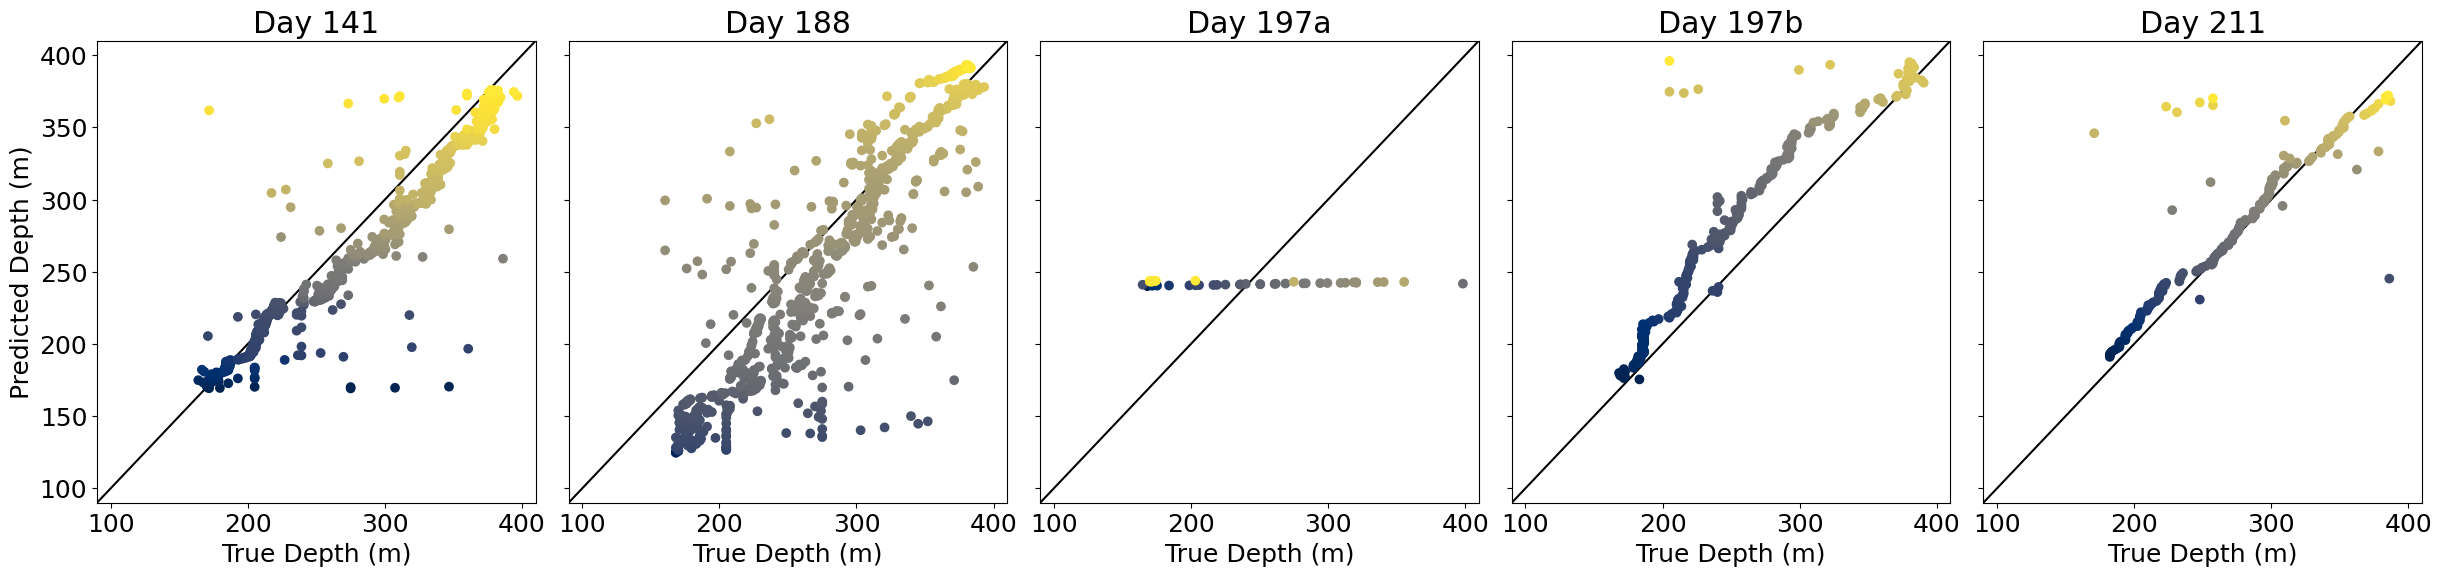

In [85]:
AMPS = []
VELS = []

fig = plt.figure(figsize=(30, 6))
mosaic = fig.subplot_mosaic('''
                            abcde
                            '''
                           ,sharey=True
                           ,sharex=True)
fig.subplots_adjust(wspace=0.075)

def plot_residuals(data, ax, **kwargs):
    data = data.copy()
    x = data['arrival_datetime'].diff()
    x = x.apply(lambda t: t.total_seconds())
    x = x.fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    print(f'r2:{lr.score(x, y)}')
    
    xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
    ymod = lr.intercept_ + lr.coef_[0] * xmod
    print(f'velocity:{lr.coef_[0]}')
    VELS.append(lr.coef_[0])

    cbar = ax.scatter(y, ymod, c=x, cmap='cividis')
    ax.plot((0, 500), (0, 500), color='black', zorder=0)
    return xmod, ymod

xymod141 = plot_residuals(data=df141, ax=mosaic['a'])
xymod188 = plot_residuals(data=df188, ax=mosaic['b'])
xymod197a = plot_residuals(data=df197[:44], ax=mosaic['c'])
xymod197b = plot_residuals(data=df197[44:], ax=mosaic['d'])
xymod211 = plot_residuals(data=df211[20:], ax=mosaic['e'])

mosaic['a'].set_ylabel('Predicted Depth (m)')
mosaic['a'].set_xlabel('True Depth (m)')
mosaic['b'].set_xlabel('True Depth (m)')
mosaic['c'].set_xlabel('True Depth (m)')
mosaic['d'].set_xlabel('True Depth (m)')
mosaic['e'].set_xlabel('True Depth (m)')
mosaic['a'].set_title('Day 141')
mosaic['b'].set_title('Day 188')
mosaic['c'].set_title('Day 197a')
mosaic['d'].set_title('Day 197b')
mosaic['e'].set_title('Day 211')
mosaic['a'].set_ylim(90, 410)
mosaic['a'].set_xlim(90, 410)
# plt.tight_layout()
# fig.savefig('fig5.pdf', bbox_inches='tight')

In [27]:
import obspy
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)

8      2019-05-21 07:38:17.744000
14     2019-05-21 07:38:42.922000
16     2019-05-21 07:38:43.766500
20     2019-05-21 07:38:53.776500
26     2019-05-21 07:38:57.606500
                  ...            
2234   2019-05-21 08:37:45.145500
2236   2019-05-21 08:37:46.245500
2237   2019-05-21 08:37:46.851500
2239   2019-05-21 08:37:48.472500
2240   2019-05-21 08:37:49.325500
Name: origin_time, Length: 1426, dtype: datetime64[ns]

In [28]:
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

8           NaN
14      25.1780
16       0.8445
20      10.0100
26       3.8300
         ...   
2234     2.2100
2236     1.1000
2237     0.6060
2239     1.6210
2240     0.8530
Name: origin_time, Length: 1426, dtype: float64

In [29]:
'''
For each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).
Code up the following where vi = instantaneous velocity at event time ti.

NOTE: remember that Rob uses matlab which is indexed from 1

zmax=z1
tmax=t1
for i = 2:N
  if zi > zmax
    vi = (zi- zmax)/(ti - tmax)
    zmax=zi
    tmax=ti
  end
end
'''

"\nFor each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).\nCode up the following where vi = instantaneous velocity at event time ti.\n\nNOTE: remember that Rob uses matlab which is indexed from 1\n\nzmax=z1\ntmax=t1\nfor i = 2:N\n  if zi > zmax\n    vi = (zi- zmax)/(ti - tmax)\n    zmax=zi\n    tmax=ti\n  end\nend\n"

In [30]:
# data = df188.copy()

# z = data.depth.values
# t = pd.to_datetime(data.origin_time.values)

# zmax = z[0]
# tmax = t[0]

# v_inst = []
# t_inst = []
# d_inst = []

# for i in np.arange(1, z.shape[0], 1):
#     if z[i] > zmax:
#         dz = z[i] - zmax
#         dt = (t[i] - tmax).total_seconds()
#         vi = dz/dt
#         v_inst.append(vi)
#         t_inst.append(dt)
#         d_inst.append(z[i])
        



In [31]:
# fig, ax = plt.subplots(figsize=(15, 5))
# ax.plot(t_inst, v_inst, marker='x')
# # ax.plot(np.cumsum(t_inst), v_inst)
# # ax.set_ylim(0.04, 0.07)
# ax.set_ylabel('instananeous velocity cm/s')

In [32]:
# fig, ax = plt.subplots(figsize=(9, 8))
# ax.scatter(v_inst, d_inst)
# ax.set_xlim(0.0, 0.1)
# ax.set_ylim(400, 150)

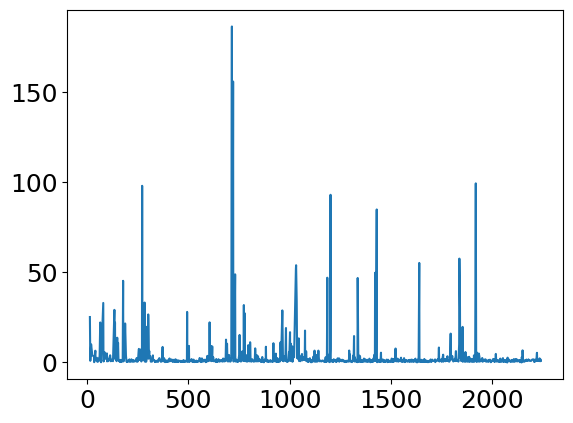

In [33]:
t = df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

plt.plot(t, )

In [34]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             # dz = z[i] - zmax
#             dz = zmax - z[i]
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
        
# ax.set_ylim(400, 150)
# ax.set_xlabel('Velocity (cm/s)')
# ax.set_ylabel('Depth (m)')
# ax.set_xlim(-0.01, 2)
# ax.legend()

events dropped for day 141: 844


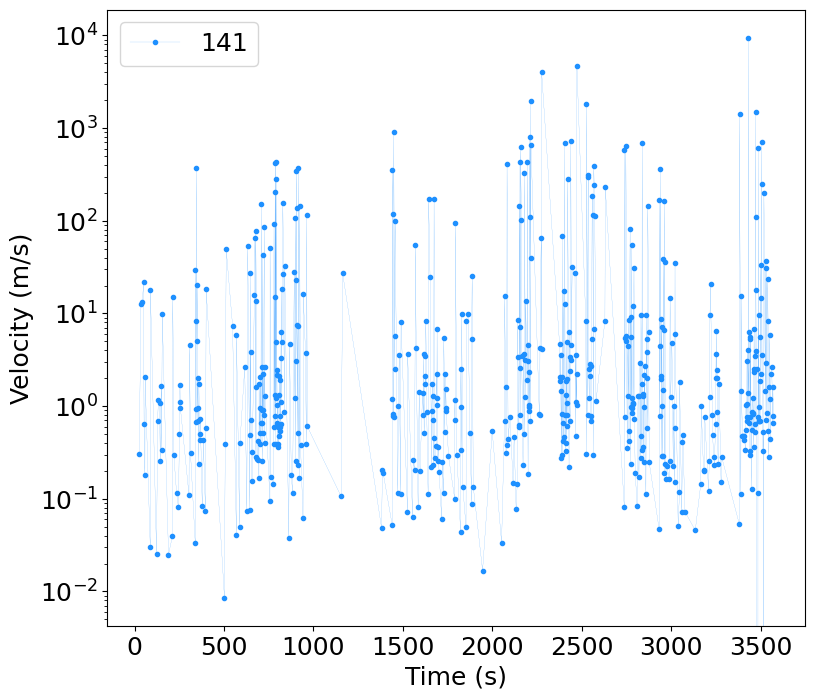

In [35]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']
fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
            vi = dz/dt
            v_inst.append(vi)
            # t_inst.append(t[i])
            t_inst.append(dt)
            d_inst.append(z[i])
            dz_inst.append(dz)
            zmax = z[i]
            tmax = t[i]
        else:
            dz_inst.append(z[i] - zmax)
            zmax = z[i]
            n+=1
    print(f'events dropped for day {day[c]}: {n}')
    dzs.append(dz_inst)

    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
    break
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()


(array([ 2.,  7., 11., 10.,  7., 13.,  3.,  7.,  8.,  7.,  5., 10., 10.,
         6., 12.,  4.,  7.,  5.,  3.,  9.,  4.,  5.,  3.,  7.,  5.,  7.,
         5.,  2.,  2.,  6.,  1.,  4.,  7.,  4.,  8.,  4.,  1.,  7.,  6.,
         6.,  4.,  5.,  2.,  3.,  3.,  2.,  3.,  2.,  5.,  3.,  4.,  3.,
         1.,  3.,  2.,  2.,  0.,  2.,  1.,  1.,  3.,  6.,  0.,  3.,  5.,
         1.,  1.,  0.,  0.,  2.,  1.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
         2.,  2.,  0.,  1.,  0.,  1.,  0.,  5.,  1.,  0.,  0.,  0.,  1.,
         0.,  2.,  1.,  1.,  1.,  0.,  2.,  1.]),
 array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
        0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
        0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
        0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
        0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
        0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
        0.60606061, 0.62626263,

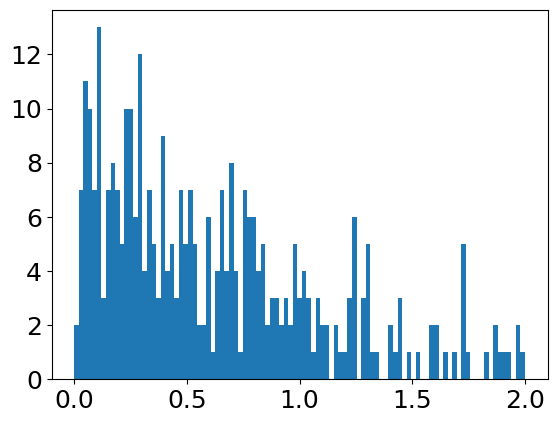

In [36]:
plt.hist(v_inst, bins=np.linspace(0, 2, 100))

In [37]:
df141.shape

(1426, 13)

In [38]:
len(dzs[0])

1425

IndexError: list index out of range

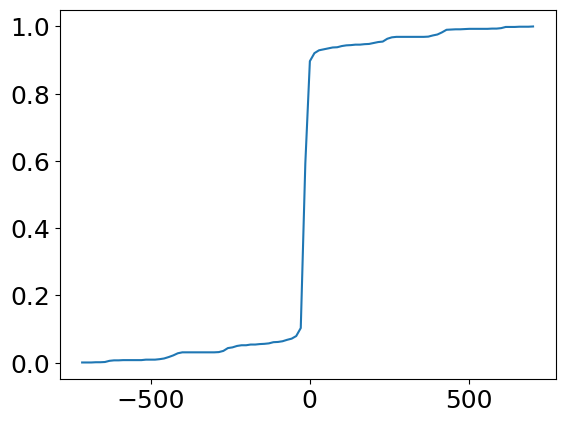

In [39]:
h, e = np.histogram(dzs[0], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')

In [ ]:
h, e = np.histogram(dzs[0], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')
plt.xlim(-1, 1)

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            vi = np.abs(dz/dt)
    
            v_inst.append(vi)
            t_inst.append(dt)
    
            zmax = z[i]
            tmax = t[i]
        else:
            n+=1
    print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    # v_inst = []
    t_inst = []
    # d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        dz = z[i] - zmax
        zmax = z[i]
        dt = (t[i] - tmax).total_seconds()
        tmax = t[i]
    #     if z[i] > zmax:
    #         dz = z[i] - zmax
    #         dt = (t[i] - tmax).total_seconds()
    #         vi = np.abs(dz/dt)
    
    #         v_inst.append(vi)
        t_inst.append(dt)
        dz_inst.append(dz)
    dzs.append(dz_inst)
    
    #         zmax = z[i]
    #         tmax = t[i]
    #     else:
    #         n+=1
    # print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    # ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    ax.scatter(t_inst, dz_inst, color=colors[c], label=day[c], marker='.')
    c += 1
        
ax.set_ylim(-100, 100)
ax.set_ylabel('dz (m)')
ax.set_xlabel('dt (s)')
ax.set_xlim(-0.01, 20)
# ax.set_yscale('log')
ax.legend()

In [ ]:
plt.hist(dzs[2], bins=1000)
# plt.xlim(-5, 5)
''

In [ ]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
#     a = data.max_amp.values
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
#     a_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             dz = z[i] - zmax
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             a_inst.append(a[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     # ax.scatter(t_inst, v_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
#     # break
        
# # ax.set_ylim(-0.01, 0.2)
# # ax.set_ylabel('Velocity (cm/s)')
# # ax.set_xlabel('Amplitude (Pa)')
# # ax.set_xlim(-0.01, 50)
# ax.legend()

In [ ]:
(t[i] - tmax).total_seconds()

In [ ]:

swarm1 = df141[['depth', 'origin_time']].copy()
swarm1['swarm_number'] = 1

swarm2 = df188[['depth', 'origin_time']].copy()
swarm2['swarm_number'] = 2

swarm3 = df197[['depth', 'origin_time']].copy()
swarm3['swarm_number'] = 3

swarm4 = df211[['depth', 'origin_time']].copy()
swarm4['swarm_number'] = 4



pd.concat([swarm1
           ,swarm2
           ,swarm3
           ,swarm4
          ]).to_csv('depths_origintimes_all_swarms.csv', index=False)